This first beat tracking example is pulled straight from the Librosa tutorial documentation, used for getting a feel for the package

In [ ]:
#Install librosa!

import sys
!conda install --yes --prefix {sys.prefix} librosa

In [2]:
# Beat tracking example
import librosa

In [3]:
# 1. Get the file path to an included audio example
filename = librosa.example('nutcracker')

In [4]:
#install ffmpeg to help with additional audio needs
!conda install --yes --prefix {sys.prefix} ffmpeg

Solving environment: done

# All requested packages already installed.



In [6]:
# 2. Load the audio as a waveform `y`
#    Store the sampling rate as `sample_rate`

y, sample_rate = librosa.load(filename)

#Edit: ignore the warning below: a quirk of Librosa, the rest of the code runs just fine

/Users/avadecroixx/opt/anaconda3/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [7]:
# 3. Run the default beat tracker
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

In [8]:
#Print the estimated tempo
print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

Estimated tempo: 107.67 beats per minute


In [9]:
# 4. Convert the frame indices of beat events into timestamps
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

In [10]:
#Print the array of beat times!
print(beat_times)

[  1.18421769   1.71827664   2.32199546   2.87927438   3.45977324
   4.01705215   4.59755102   5.13160998   5.7353288    6.29260771
   6.84988662   7.40716553   7.9876644    8.54494331   9.12544218
   9.65950113  10.21678005  10.72761905  11.28489796  11.79573696
  12.32979592  12.86385488  13.42113379  13.95519274  14.4892517
  15.02331066  15.55736961  16.09142857  16.62548753  17.15954649
  17.69360544  18.25088435  18.80816327  19.31900227  19.87628118
  20.38712018  20.92117914  21.4552381   21.98929705  22.52335601
  23.05741497  23.59147392  24.12553288  24.65959184  25.19365079
  25.72770975  26.26176871  26.81904762  27.35310658  27.88716553
  28.44444444  29.00172336  29.55900227  30.11628118  30.67356009
  31.20761905  31.78811791  32.34539683  32.85623583  33.36707483
  33.90113379  34.43519274  34.94603175  35.45687075  35.99092971
  36.52498866  37.03582766  37.56988662  38.12716553  38.66122449
  39.2185034   39.75256236  40.30984127  40.84390023  41.40117914
  41.935238

In [11]:
#SPECTROGRAM FUN STUFF - also mostly taken from the Librosa documentation, with a few minor modifications

import sys

#install and import numpy
!conda install --yes --prefix {sys.prefix} numpy 
import numpy

Solving environment: done

# All requested packages already installed.



In [12]:
#Decompose a magnitude spectrogram into components with NMF
y, sr = librosa.load(librosa.ex('choice'), duration=5)
S = numpy.abs(librosa.stft(y))
components, acts = librosa.decompose.decompose(S, n_components=8)

#Edit: ignore the warning below: same as before

/Users/avadecroixx/opt/anaconda3/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/Users/avadecroixx/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/Users/avadecroixx/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [13]:
#Sort components by ascending peak frequency
components, acts = librosa.decompose.decompose(S, n_components=16,
                                          sort=True)

#Edit: ignore the warning below: same as before

/Users/avadecroixx/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/Users/avadecroixx/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


[Text(0, 0.5, 'Components'), Text(0.5, 1.0, 'Activations')]

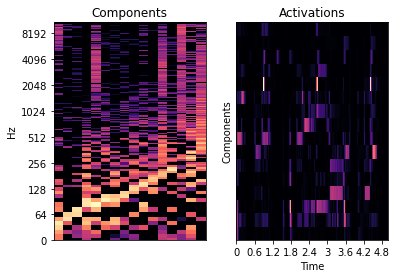

In [14]:
#Display graph of components and activations

import matplotlib.pyplot as plt

#This needs to be explicitly imported!
import librosa.display
fig, ax = plt.subplots(nrows=1, ncols=2)
librosa.display.specshow(librosa.amplitude_to_db(comps,
                                                 ref=numpy.max),
                         y_axis='log', ax=ax[0])
ax[0].set(title='Components')
librosa.display.specshow(acts, x_axis='time', ax=ax[1])
ax[1].set(ylabel='Components', title='Activations')

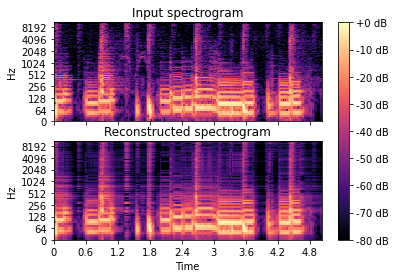

In [15]:
#Display input spectrogram and reconstructed spectrogram

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=numpy.max),
                         y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Input spectrogram')
ax[0].label_outer()
S_approx = comps.dot(acts)
img = librosa.display.specshow(librosa.amplitude_to_db(S_approx,
                                                 ref=numpy.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='Reconstructed spectrogram')
fig.colorbar(img, ax=ax, format="%+2.f dB")